In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from astropy.coordinates import SkyCoord
from astropy import units as u
from ipywidgets import interact, Dropdown

In [2]:
def equatorial_to_galactic(ra, dec):
    # Convert degrees to radians
    ra_rad = np.radians(ra)
    dec_rad = np.radians(dec)
    
    # Galactic pole coordinates (in degrees)
    pole_ra = 192.25
    pole_dec = 27.4
    
    # Galactic pole coordinates (in radians)
    pole_ra_rad = np.radians(pole_ra)
    pole_dec_rad = np.radians(pole_dec)
    
    # Convert equatorial coordinates to galactic coordinates
    sin_b = np.sin(dec_rad) * np.sin(pole_dec_rad) + np.cos(dec_rad) * np.cos(pole_dec_rad) * np.cos(ra_rad - pole_ra_rad)
    cos_b_cos_l = np.cos(dec_rad) * np.cos(ra_rad - pole_ra_rad) / sin_b
    cos_l = (np.cos(dec_rad) * np.sin(ra_rad - pole_ra_rad)) / sin_b
    
    # Calculate galactic latitude (b) and longitude (l)
    b_rad = np.arcsin(sin_b)
    l_rad = np.arccos(cos_l)
    
    # Convert radians to degrees and ensure l is in the correct quadrant
    l_deg = np.degrees(l_rad)
    b_deg = np.degrees(b_rad)
    if np.sin(ra_rad - pole_ra_rad) < 0:
        l_deg = 360 - l_deg
    
    return l_deg, b_deg

In [3]:
df = pd.read_csv('AllGiants_Predict2023.csv')
len(df)

148477

In [4]:
def estimate_cartesian_coordinates_ra_dec(D, ra, dec):
    icrs = SkyCoord(ra=ra*u.degree, dec=dec*u.degree, frame='icrs')
    galactic = icrs.galactic
    l_rad = galactic.l.radian
    b_rad = galactic.b.radian
    
    X = D * np.cos(b_rad) * np.cos(l_rad)
    Y = D * np.cos(b_rad) * np.sin(l_rad)
    z = D * np.sin(b_rad)
    
    return X, Y, z

In [5]:
def estimate_Galactocentric_radius(R_0, D, ra, dec, z):
    # Convert RA and DEC to Galactic coordinates (l, b)
    icrs = SkyCoord(ra=ra*u.degree, dec=dec*u.degree, frame='icrs')
    galactic = icrs.galactic
    l = galactic.l.deg  # Galactic longitude in degrees
    
    # Calculate Galactocentric radius
    R = np.sqrt(R_0**2 - 2 * R_0 * D * np.cos(np.radians(l)) + D**2 + z**2)
    return R

In [6]:
for i in df.columns:
    print(i)

#ID
RA
DEC
u
J378
J395
J410
J430
g
J515
r
J660
i
J861
z
ebv_sfd
e_u
e_J0378
e_J0395
e_J0410
e_J0430
e_g
e_J0515
e_r
e_J0660
e_i
e_J0861
e_z
pmRA
e_pmRA
pmDE
e_pmDE
Gmag
e_Gmag
BPmag
e_BPmag
RPmag
e_RPmag
E(BP/RP)
E(BP-RP)
RV
e_RV
Teff
logg
b_logg_x
[Fe/H]
Dist
b_Dist_x
B_Dist_xa
Line_Label
NNpredict_Galah_Teff
NNpredict_Galah_Teff_Flag
NNpredict_Galah_logg
NNpredict_Galah_logg_Flag
NNpredict_Apogee_TEFF
NNpredict_Apogee_TEFF_Flag
NNpredict_Apogee_LOGG
NNpredict_Apogee_LOGG_Flag
NNpredict_Apogee_FE_H
NNpredict_Apogee_FE_H_Flag
NNpredict_Apogee_ALPHA_M
NNpredict_Apogee_ALPHA_M_Flag
NNpredict_Apogee_C_FE
NNpredict_Apogee_C_FE_Flag
NNpredict_Apogee_MG_FE
NNpredict_Apogee_MG_FE_Flag
NNpredict_Apogee_SI_FE
NNpredict_Apogee_SI_FE_Flag
NNpredict_Apogee_CI_FE
NNpredict_Apogee_CI_FE_Flag
NNpredict_Apogee_O_FE
NNpredict_Apogee_O_FE_Flag
NNpredict_Apogee_AL_FE
NNpredict_Apogee_AL_FE_Flag
NNpredict_Apogee_TI_FE
NNpredict_Apogee_TI_FE_Flag
NNpredict_Apogee_MN_FE
NNpredict_Apogee_MN_FE_Flag
NNpredict

In [7]:
def plot_data(D, z, c, cmap, c_label):
    fig, ax = plt.subplots(figsize=(14, 10))
    plt.tick_params(axis='x', labelsize=30) 
    plt.tick_params(axis='y', labelsize=30)
    plt.xlabel(r'R (kpc) ', fontsize=30)
    plt.ylabel(r'Z (kpc) ', fontsize=30)

    # Adjust alpha and marker size to achieve cloud-like effect with visible color
    scatter = ax.scatter(D, z, c=c, cmap=cmap, s=9, alpha=0.6, edgecolors="none", zorder=2, lw=0.5)

    # Add a colorbar with improved visibility
    cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', pad=0.03, format='%.1f')
    cbar.set_label(c_label, fontsize=30)  # Label for the colorbar

    # Set the font size of colorbar labels
    cbar.ax.tick_params(labelsize=30)  # Adjust the font size as needed
    # Tighten the layout
    plt.tight_layout()

    
    plt.show()

# Example usage:
# plot_data(D, z, Fe, 'nipy_spectral', 'Fe/H')
# plot_data(D, z, Mg, 'nipy_spectral', 'Mg')

In [8]:
#mask = df["Plx"] >= 0
#df = df[mask]
#len(df)

In [9]:
#Plx = df["Plx"]


In [10]:
Fe = df["NNpredict_Apogee_FE_H"]

In [11]:
ra = df["RA"]
dec = df["DEC"]


In [12]:
icrs = SkyCoord(ra=ra*u.degree, dec=dec*u.degree, frame='icrs')
gal = icrs.galactic  

In [13]:

b_rad = gal.b.radian


In [14]:
# distance from GAIA
D = df["Dist"] / 1000

In [15]:
z = D  * np.sin(b_rad)
#z = D /  np.sin(np.radians(bb))
print("IzI =", z)


IzI = 0        -2.417792
1        -2.486194
2        -1.421917
3        -0.395618
4        -1.228771
            ...   
148472   -0.894262
148473   -0.922102
148474   -1.424023
148475   -1.309610
148476   -1.387986
Name: Dist, Length: 148477, dtype: float64


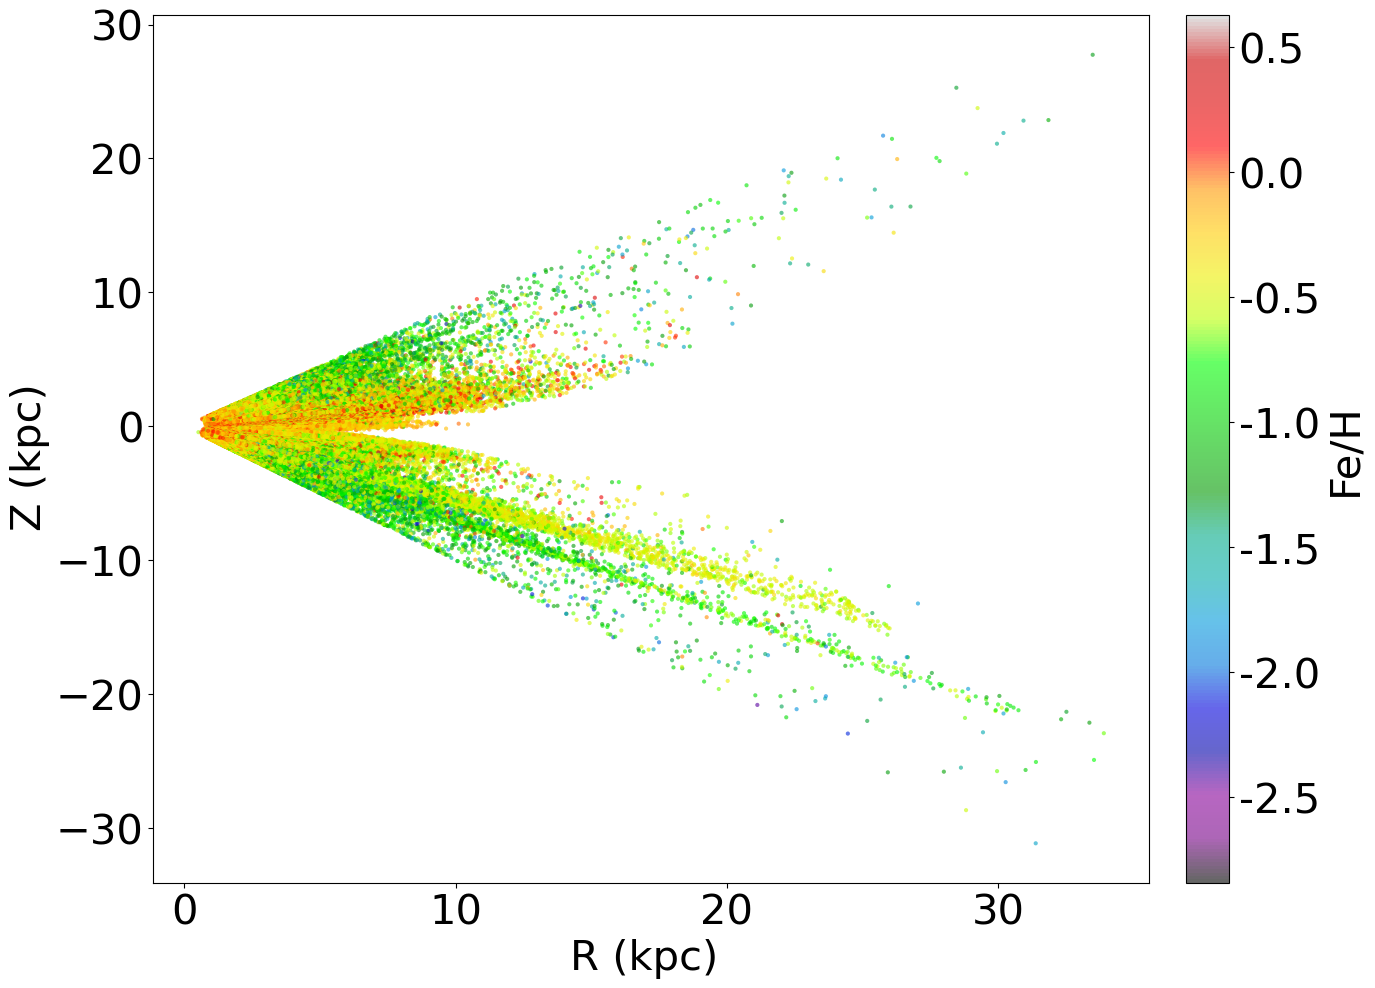

In [16]:
plot_data(D, z, Fe, 'nipy_spectral', 'Fe/H')

In [17]:
X, Y, Z = estimate_cartesian_coordinates_ra_dec(D, ra, dec)

In [18]:
R = np.sqrt(X**2 + Y**2)

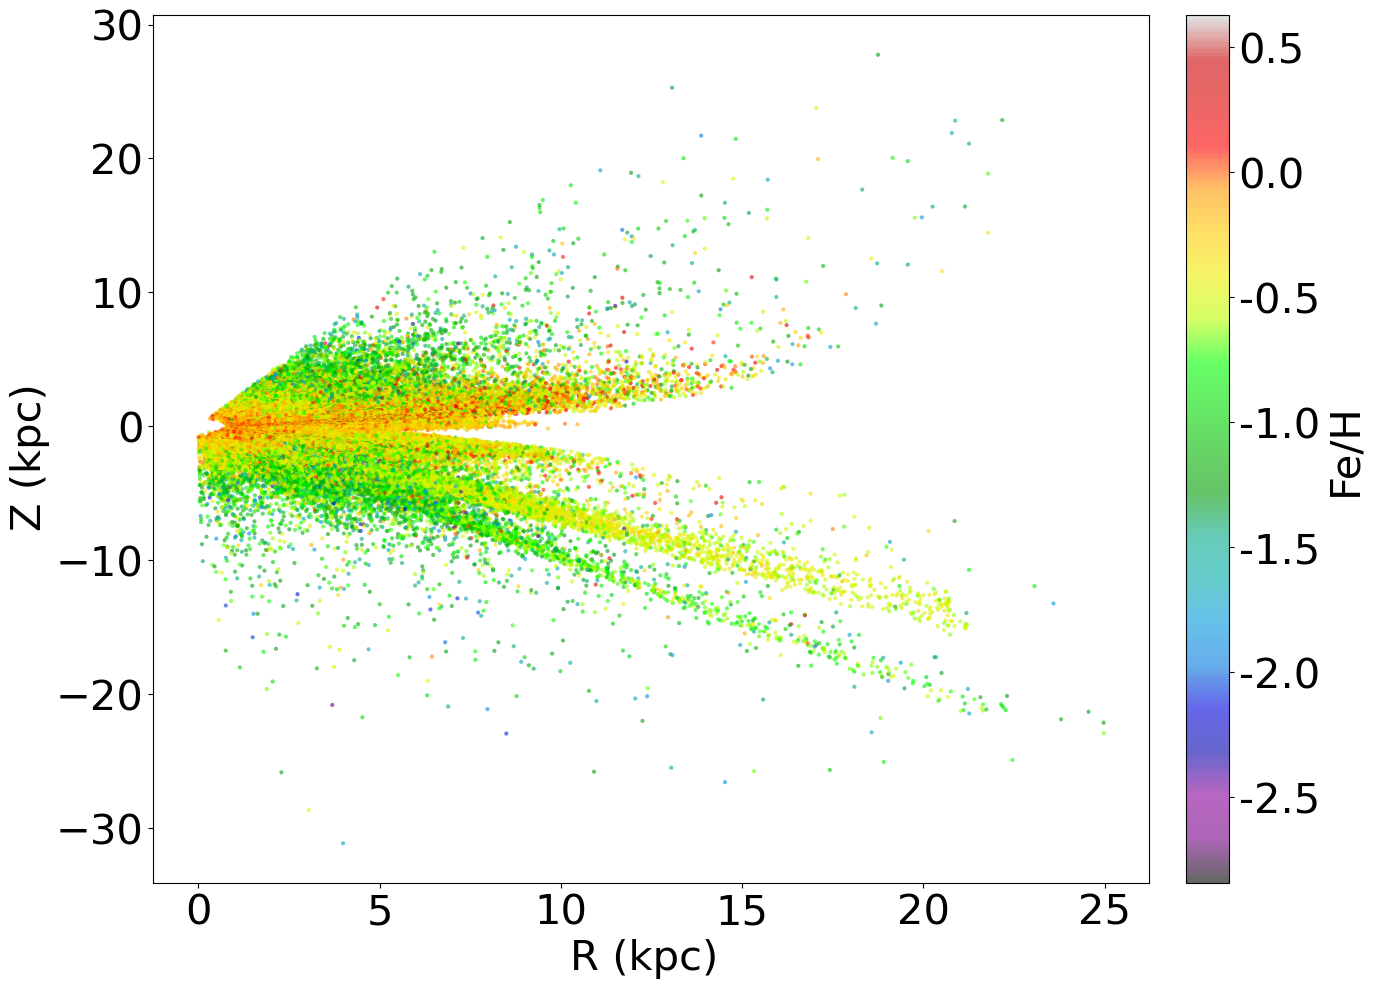

In [19]:
plot_data(R, Z, Fe, 'nipy_spectral', 'Fe/H')

In [20]:
Mg = df["NNpredict_Apogee_MG_FE"]


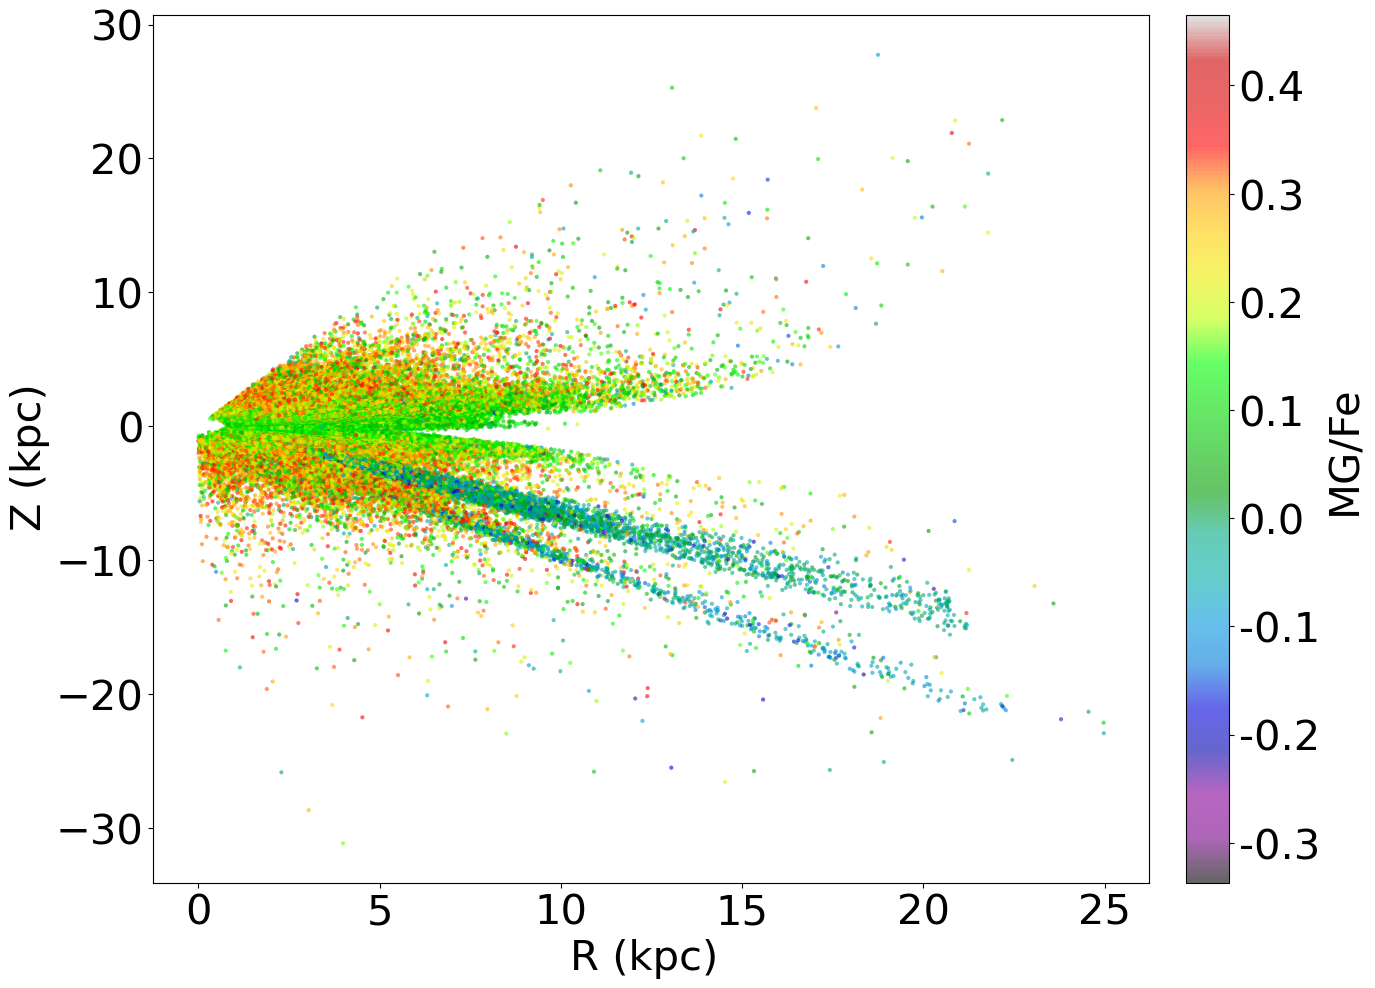

In [21]:
plot_data(R, Z, Mg, 'nipy_spectral', 'MG/Fe')

In [22]:
Si = df["NNpredict_Apogee_SI_FE"]

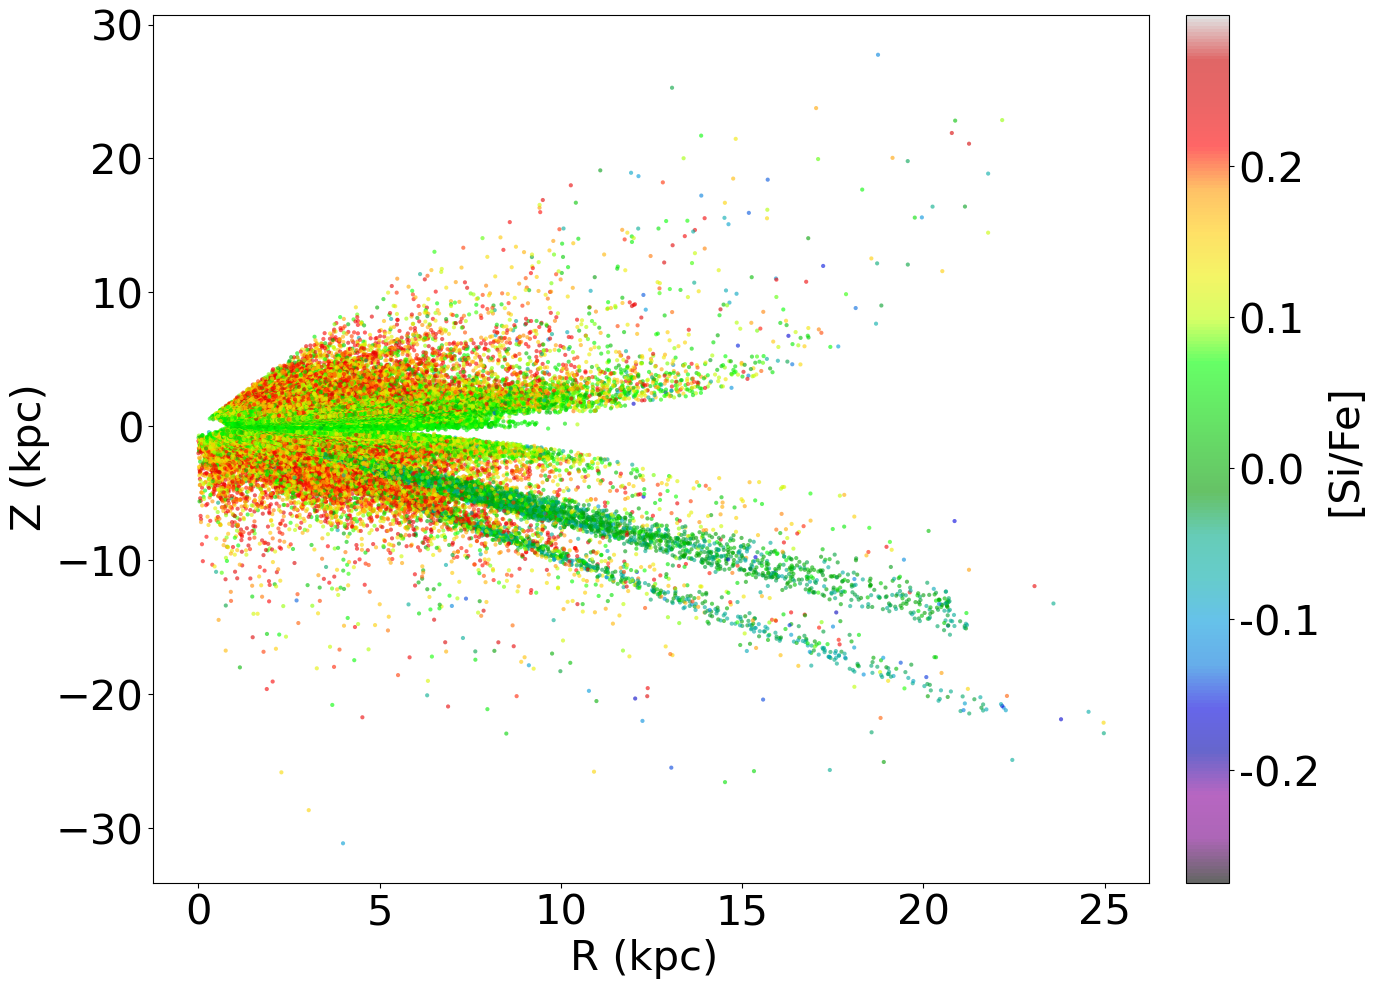

In [23]:
plot_data(R, Z, Si, 'nipy_spectral', '[Si/Fe]')

In [24]:
alfa = df["NNpredict_Apogee_ALPHA_M"]

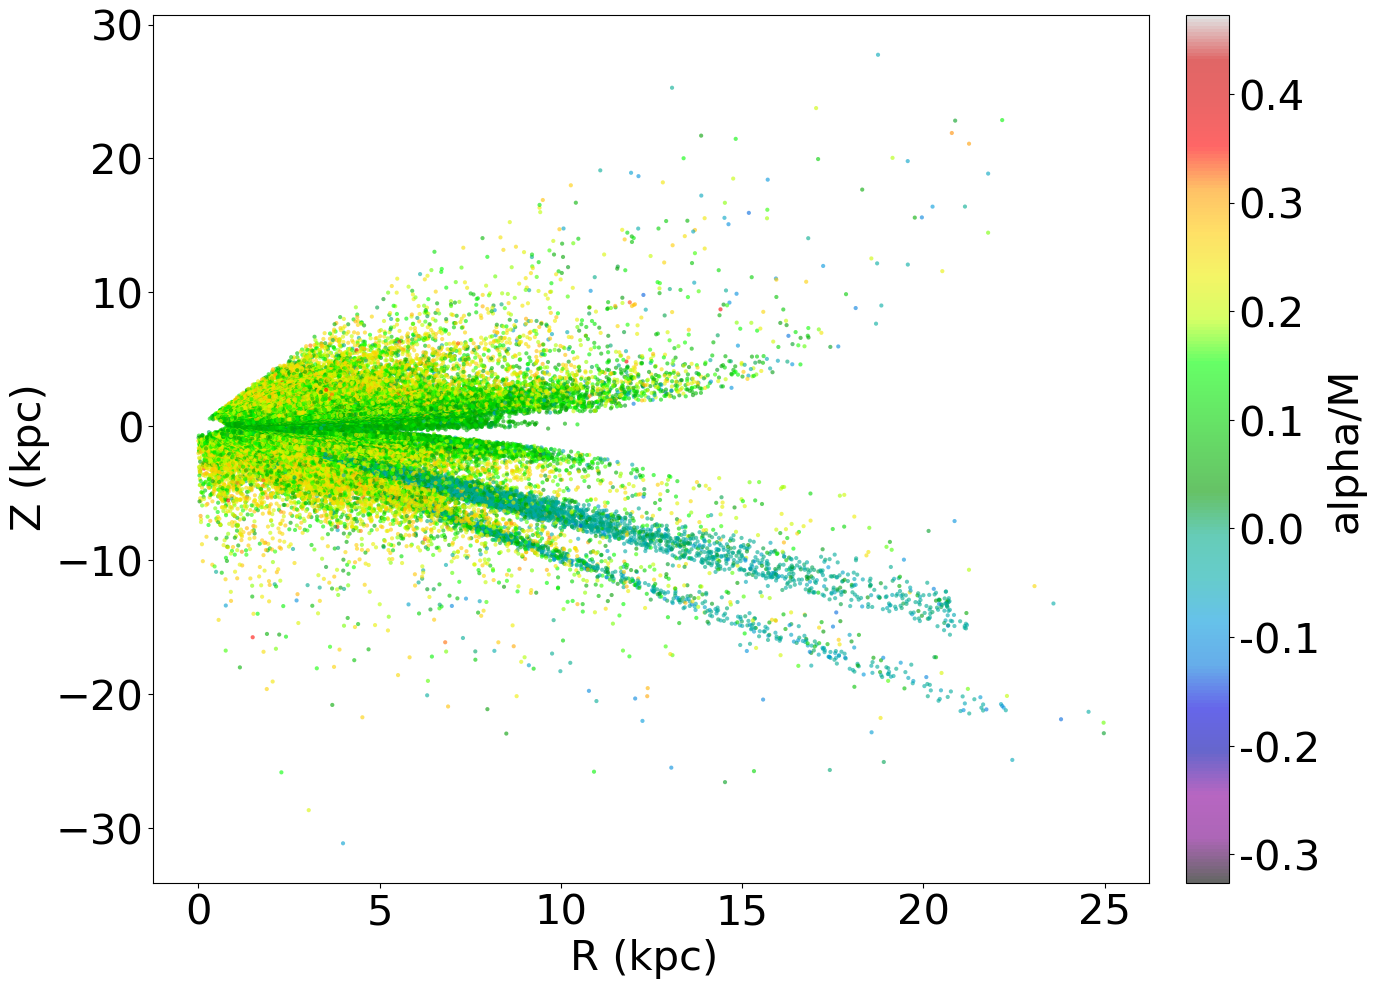

In [25]:
plot_data(R, Z, alfa, 'nipy_spectral', 'alpha/M')

# Undestand

In [26]:
mask_mg = (df["NNpredict_Apogee_MG_FE"]<=-0.05) & (df["NNpredict_Apogee_MG_FE"]>=-0.1)

In [27]:
df_mg = df[mask_mg]
df_mg

#ID          RA       DEC        u     J378  \
1027    iDR4_3_STRIPE82-0101_0101661  309.754942 -0.139670  17.7755  17.2311   
1572    iDR4_3_STRIPE82-0104_0050721  311.532210  0.814505  18.6764  18.1497   
3291    iDR4_3_STRIPE82-0122_0039778  324.699400  1.008589  18.3928  17.9059   
3644    iDR4_3_STRIPE82-0132_0032818  331.192838  0.841236  19.8151  19.1934   
3925    iDR4_3_STRIPE82-0025_0045974   16.965291 -0.019312  19.0295  18.5037   
...                              ...         ...       ...      ...      ...   
143132  iDR4_3_STRIPE82-0053_0017589   36.638228 -0.888420  19.3429  18.8349   
143142  iDR4_3_STRIPE82-0054_0003884   36.167322  0.121819  18.7964  18.4348   
143215  iDR4_3_STRIPE82-0059_0048512   40.938318 -0.262909  19.3840  18.7994   
143401  iDR4_3_STRIPE82-0077_0024942   54.283966 -0.741660  19.0460  18.5776   
147626  iDR4_3_STRIPE82-0095_0031071  306.775037 -0.930242  18.1356  17.5081   

           J395     J410     J430        g     J515  ...  \
1027    17.1778  16.2780  15.9983  15.2749  14.9673  ...   
1572    17.9622  17.1843  16.7847  15.7004  15.4123  ...   
3291    17.7312  17.0152  16.7787  16.0934  15.8282  ...   
3644    19.0933  18.2457  17.9475  17.2478  16.9273  ...   
3925    18.3393  17.4903  17.2298  16.4811  16.2032  ...   
...         ...      ...      ...      ...      ...  ...   
143132  18.5240  17.3991  16.7352  15.4494  15.1547  ...   
143142  18.1222  17.2208  16.8387  15.8954  15.5599  ...   
143215  18.6465  17.5901  17.0785  15.9941  15.6821  ...   
143401  18.3403  17.4923  17.1183  16.1060  15.7619  ...   
147626  17.3970  16.6435  16.3701  15.6884  15.4507  ...   

        NNpredict_Apogee_AL_FE  NNpredict_Apogee_AL_FE_Flag  \
1027                 -0.345165                          100   
1572                 -0.396595                          100   
3291                 -0.318939                          100   
3644                 -0.368822                          100   
3925                 -0.370419                          100   
...                        ...                          ...   
143132               -0.366969                           94   
143142               -0.373036                          100   
143215               -0.356196                          100   
143401               -0.393279                          100   
147626               -0.296961                          100   

        NNpredict_Apogee_TI_FE  NNpredict_Apogee_TI_FE_Flag  \
1027                 -0.144057                          100   
1572                 -0.176821                          100   
3291                 -0.138004                          100   
3644                 -0.166479                          100   
3925                 -0.181181                          100   
...                        ...                          ...   
143132               -0.068262                           39   
143142               -0.193198                          100   
143215               -0.180523                          100   
143401               -0.237985                          100   
147626               -0.162974                          100   

        NNpredict_Apogee_MN_FE  NNpredict_Apogee_MN_FE_Flag  \
1027                 -0.239738                          100   
1572                 -0.074521                          100   
3291                 -0.241613                          100   
3644                 -0.262966                          100   
3925                 -0.157833                          100   
...                        ...                          ...   
143132               -0.006483                           39   
143142               -0.075489                          100   
143215               -0.125013                          100   
143401               -0.154127                          100   
147626               -0.210553                          100   

        NNpredict_Galah_[Fe/H]  NNpredict_Galah_[Fe/H]_Flag  \
1027             

In [28]:
MG_cut = df_mg["NNpredict_Apogee_MG_FE"]

In [29]:
ra_cut = df_mg["RA"]
dec_cut = df_mg["DEC"]


In [30]:
icrs_cut = SkyCoord(ra=ra_cut*u.degree, dec=dec_cut*u.degree, frame='icrs')
gal_cut = icrs_cut.galactic  

In [31]:
b_rad_cut = gal_cut.b.radian


In [32]:
# distance from GAIA
D_cut = df_mg["Dist"] / 1000


In [33]:
z_cut = D_cut  * np.sin(b_rad_cut)

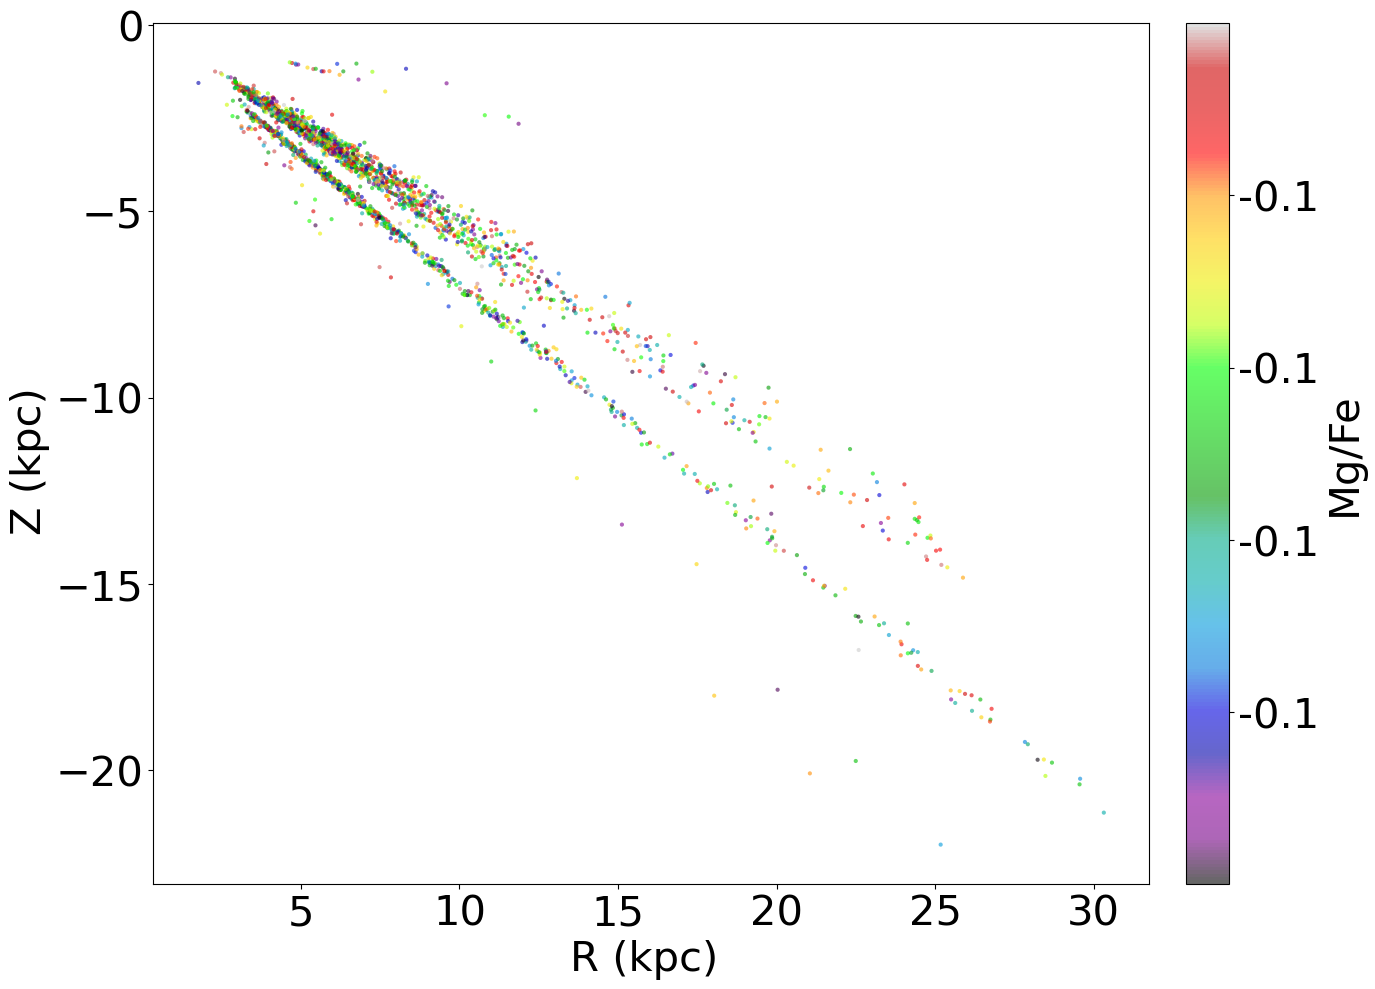

In [34]:

plot_data(D_cut[z_cut < -1], z_cut[z_cut < -1], MG_cut[z_cut < -1], 'nipy_spectral', 'Mg/Fe')

In [35]:
df_mg[z_cut < -1]

#ID          RA       DEC        u     J378  \
1027    iDR4_3_STRIPE82-0101_0101661  309.754942 -0.139670  17.7755  17.2311   
1572    iDR4_3_STRIPE82-0104_0050721  311.532210  0.814505  18.6764  18.1497   
3291    iDR4_3_STRIPE82-0122_0039778  324.699400  1.008589  18.3928  17.9059   
3644    iDR4_3_STRIPE82-0132_0032818  331.192838  0.841236  19.8151  19.1934   
3925    iDR4_3_STRIPE82-0025_0045974   16.965291 -0.019312  19.0295  18.5037   
...                              ...         ...       ...      ...      ...   
143120  iDR4_3_STRIPE82-0051_0029170   35.905474 -0.699927  19.6230  19.1143   
143132  iDR4_3_STRIPE82-0053_0017589   36.638228 -0.888420  19.3429  18.8349   
143142  iDR4_3_STRIPE82-0054_0003884   36.167322  0.121819  18.7964  18.4348   
143215  iDR4_3_STRIPE82-0059_0048512   40.938318 -0.262909  19.3840  18.7994   
143401  iDR4_3_STRIPE82-0077_0024942   54.283966 -0.741660  19.0460  18.5776   

           J395     J410     J430        g     J515  ...  \
1027    17.1778  16.2780  15.9983  15.2749  14.9673  ...   
1572    17.9622  17.1843  16.7847  15.7004  15.4123  ...   
3291    17.7312  17.0152  16.7787  16.0934  15.8282  ...   
3644    19.0933  18.2457  17.9475  17.2478  16.9273  ...   
3925    18.3393  17.4903  17.2298  16.4811  16.2032  ...   
...         ...      ...      ...      ...      ...  ...   
143120  18.7629  17.6691  17.0597  15.7300  15.4063  ...   
143132  18.5240  17.3991  16.7352  15.4494  15.1547  ...   
143142  18.1222  17.2208  16.8387  15.8954  15.5599  ...   
143215  18.6465  17.5901  17.0785  15.9941  15.6821  ...   
143401  18.3403  17.4923  17.1183  16.1060  15.7619  ...   

        NNpredict_Apogee_AL_FE  NNpredict_Apogee_AL_FE_Flag  \
1027                 -0.345165                          100   
1572                 -0.396595                          100   
3291                 -0.318939                          100   
3644                 -0.368822                          100   
3925                 -0.370419                          100   
...                        ...                          ...   
143120               -0.403888                          100   
143132               -0.366969                           94   
143142               -0.373036                          100   
143215               -0.356196                          100   
143401               -0.393279                          100   

        NNpredict_Apogee_TI_FE  NNpredict_Apogee_TI_FE_Flag  \
1027                 -0.144057                          100   
1572                 -0.176821                          100   
3291                 -0.138004                          100   
3644                 -0.166479                          100   
3925                 -0.181181                          100   
...                        ...                          ...   
143120               -0.130302                           51   
143132               -0.068262                           39   
143142               -0.193198                          100   
143215               -0.180523                          100   
143401               -0.237985                          100   

        NNpredict_Apogee_MN_FE  NNpredict_Apogee_MN_FE_Flag  \
1027                 -0.239738                          100   
1572                 -0.074521                          100   
3291                 -0.241613                          100   
3644                 -0.262966                          100   
3925                 -0.157833                          100   
...                        ...                          ...   
143120               -0.059325                           51   
143132               -0.006483                           39   
143142               -0.075489                          100   
143215               -0.125013                          100   
143401               -0.154127                          100   

        NNpredict_Galah_[Fe/H]  NNpredict_Galah_[Fe/H]_Flag  \
1027             

In [36]:
def aitoff_plot(ra, dec, cmap):
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111, projection='aitoff')

    # Convert RA and Dec to radians
    ra_rad = np.radians(ra)
    dec_rad = np.radians(dec)

    # Adjust alpha and marker size to achieve cloud-like effect with visible color
    scatter = ax.scatter(ra_rad, dec_rad, cmap=cmap, s=12, alpha=0.6, edgecolors="none", zorder=2)



    # Set grid and labels
    ax.grid(True)
    ax.set_xticklabels(['14h', '16h', '18h', '20h', '22h', '0h', '2h', '4h', '6h', '8h', '10h'])
    ax.set_xlabel('Right Ascension', fontsize=14)
    ax.set_ylabel('Declination', fontsize=14)

    plt.tight_layout()
    plt.show()

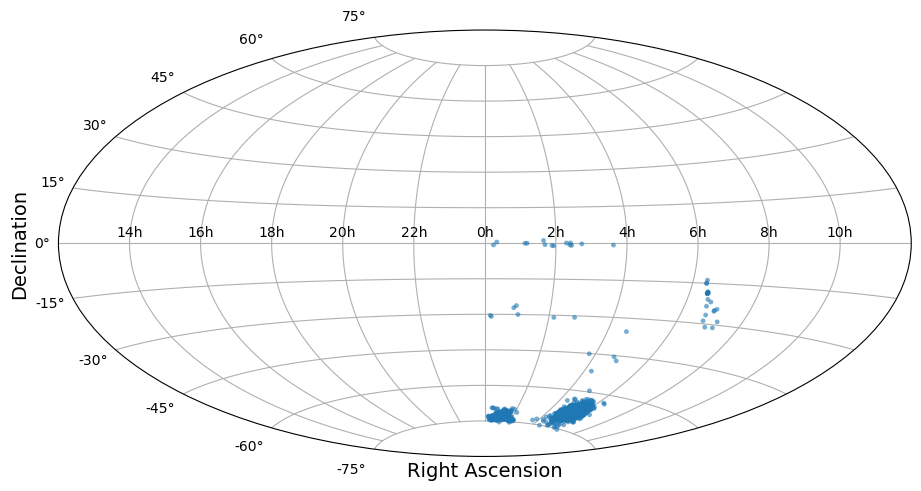

In [37]:
aitoff_plot(df_mg["RA"][z_cut < -1], df_mg["DEC"][z_cut < -1], 'nipy_spectral')

In [38]:
Si_cut = df_mg["NNpredict_Apogee_SI_FE"]

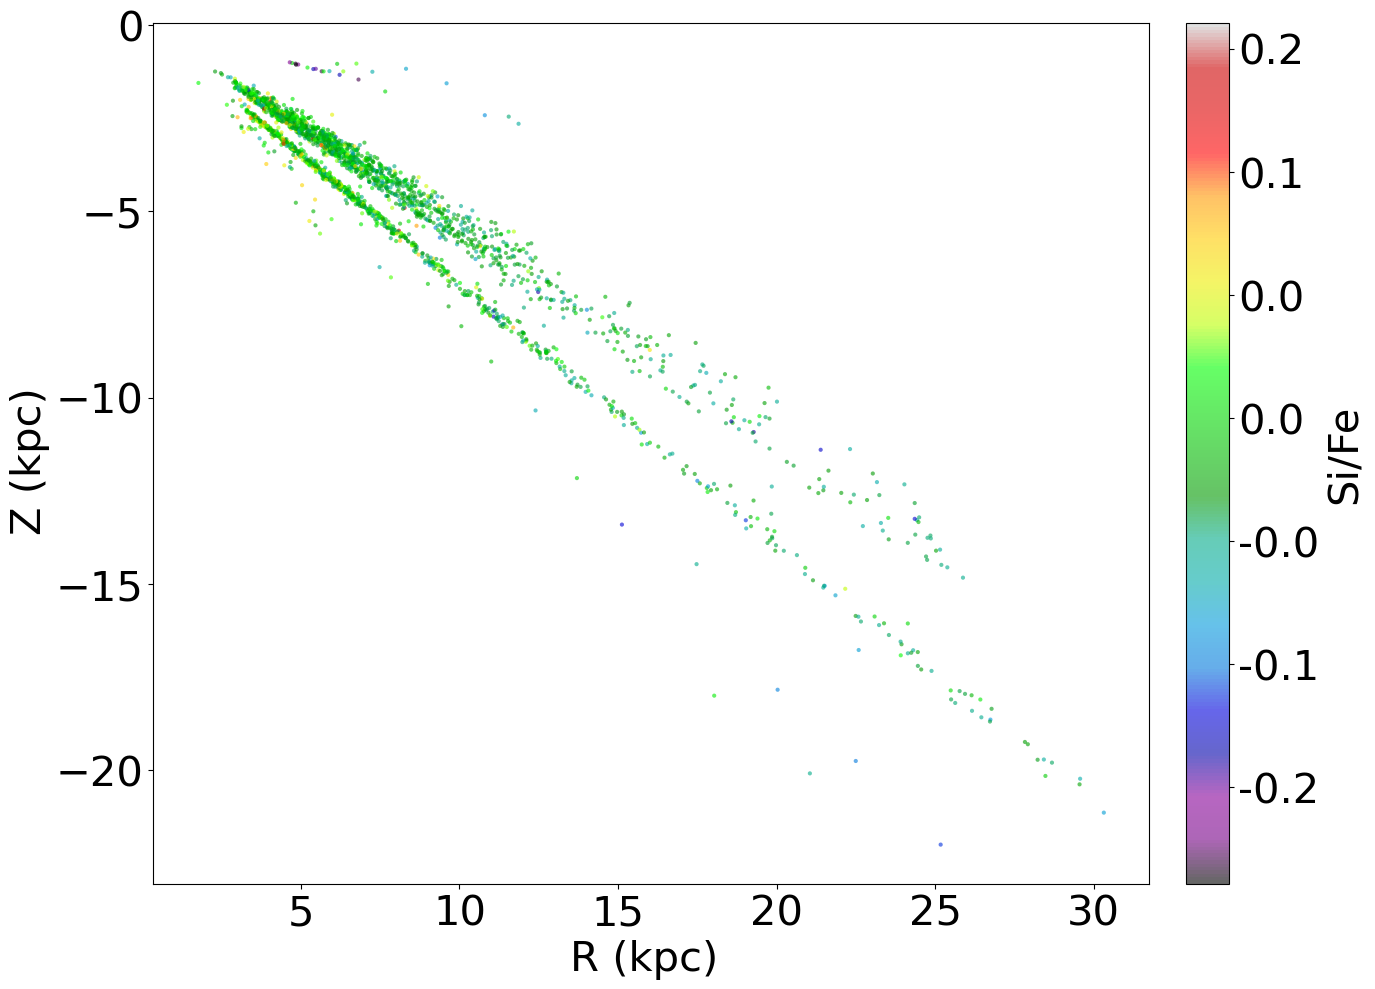

In [39]:
plot_data(D_cut[z_cut < -1], z_cut[z_cut < -1], Si_cut[z_cut < -1], 'nipy_spectral', 'Si/Fe')

# Dropping 

In [40]:
# Filter rows where ID column contains "STRIPE82"
filtered_df = df[~df['#ID'].str.contains('MC')]

In [41]:
filtered_MG = filtered_df["NNpredict_Apogee_MG_FE"]

In [42]:
filtered_ra = filtered_df["RA"]
filtered_dec = filtered_df["DEC"]

In [43]:
filtered_icrs = SkyCoord(ra=filtered_ra*u.degree, dec=filtered_dec*u.degree, frame='icrs')
filtered_gal = filtered_icrs.galactic  

In [44]:
filtered_b_rad = filtered_gal.b.radian

In [45]:
# distance from GAIA
filtered_D = filtered_df["Dist"] / 1000

In [46]:
filtered_z = filtered_D * np.sin(filtered_b_rad)


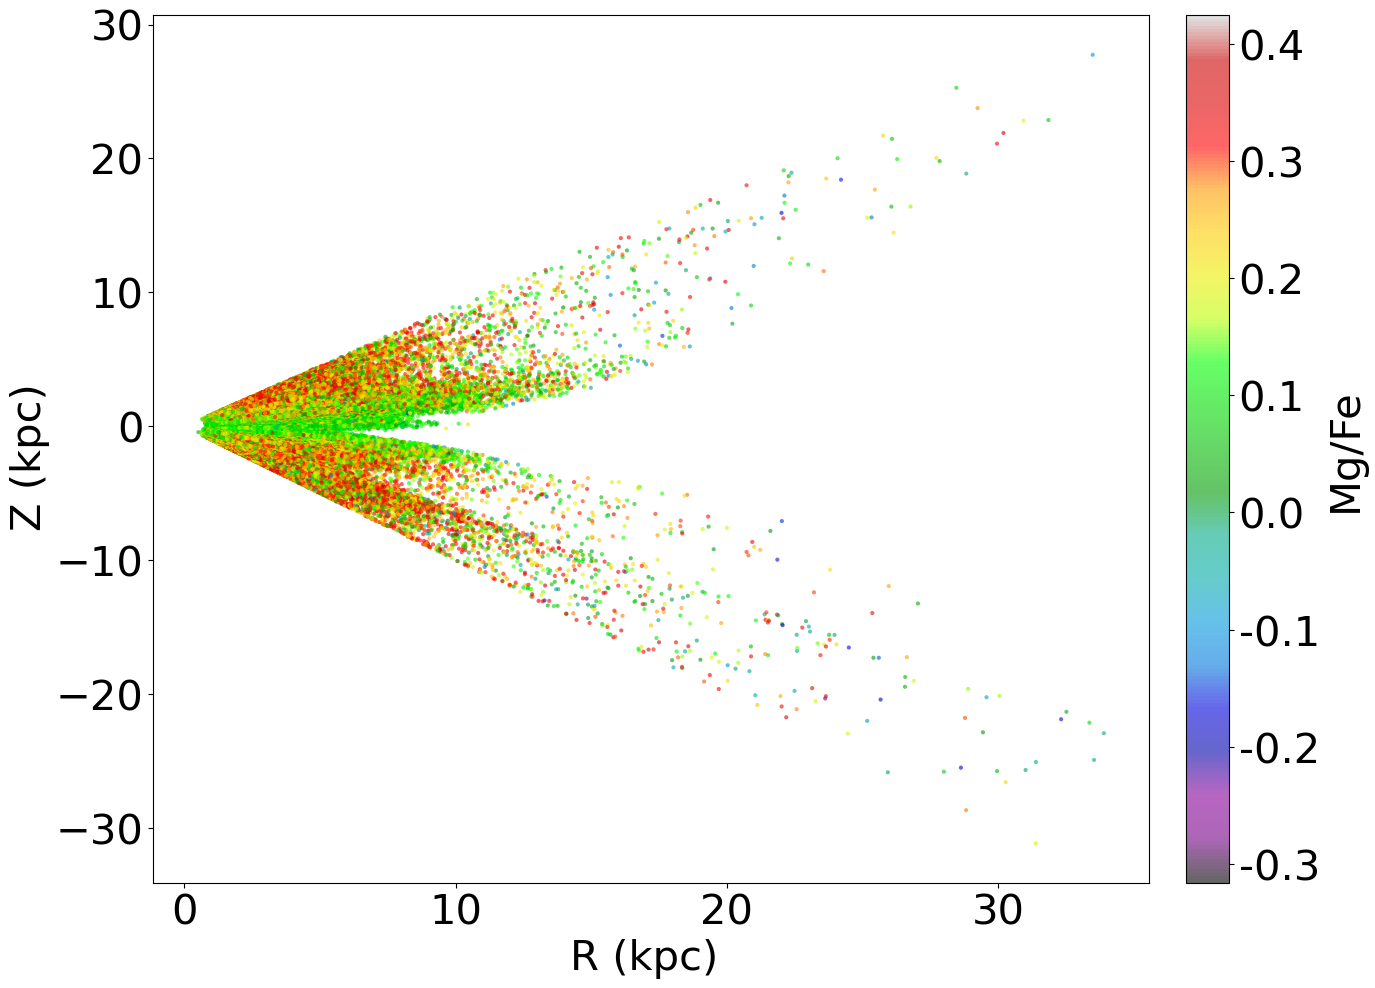

In [47]:
plot_data(filtered_D, filtered_z, filtered_MG, 'nipy_spectral', 'Mg/Fe')

In [48]:
filtered_SI = filtered_df["NNpredict_Apogee_SI_FE"]

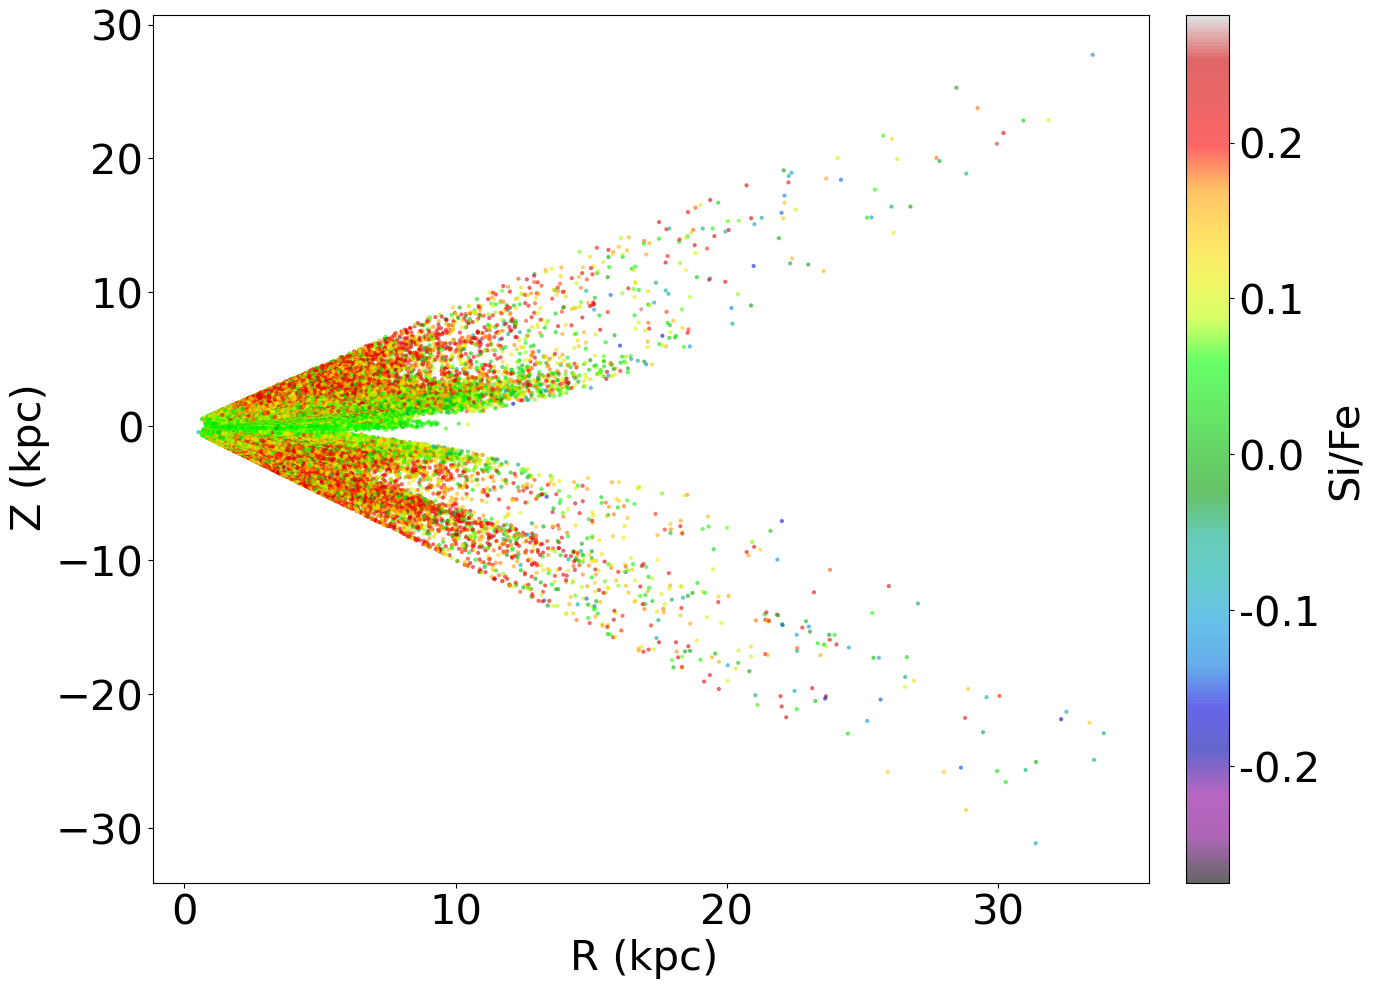

In [49]:
plot_data(filtered_D, filtered_z, filtered_SI, 'nipy_spectral', 'Si/Fe')

In [50]:
filtered_alfa = filtered_df["NNpredict_Apogee_ALPHA_M"]

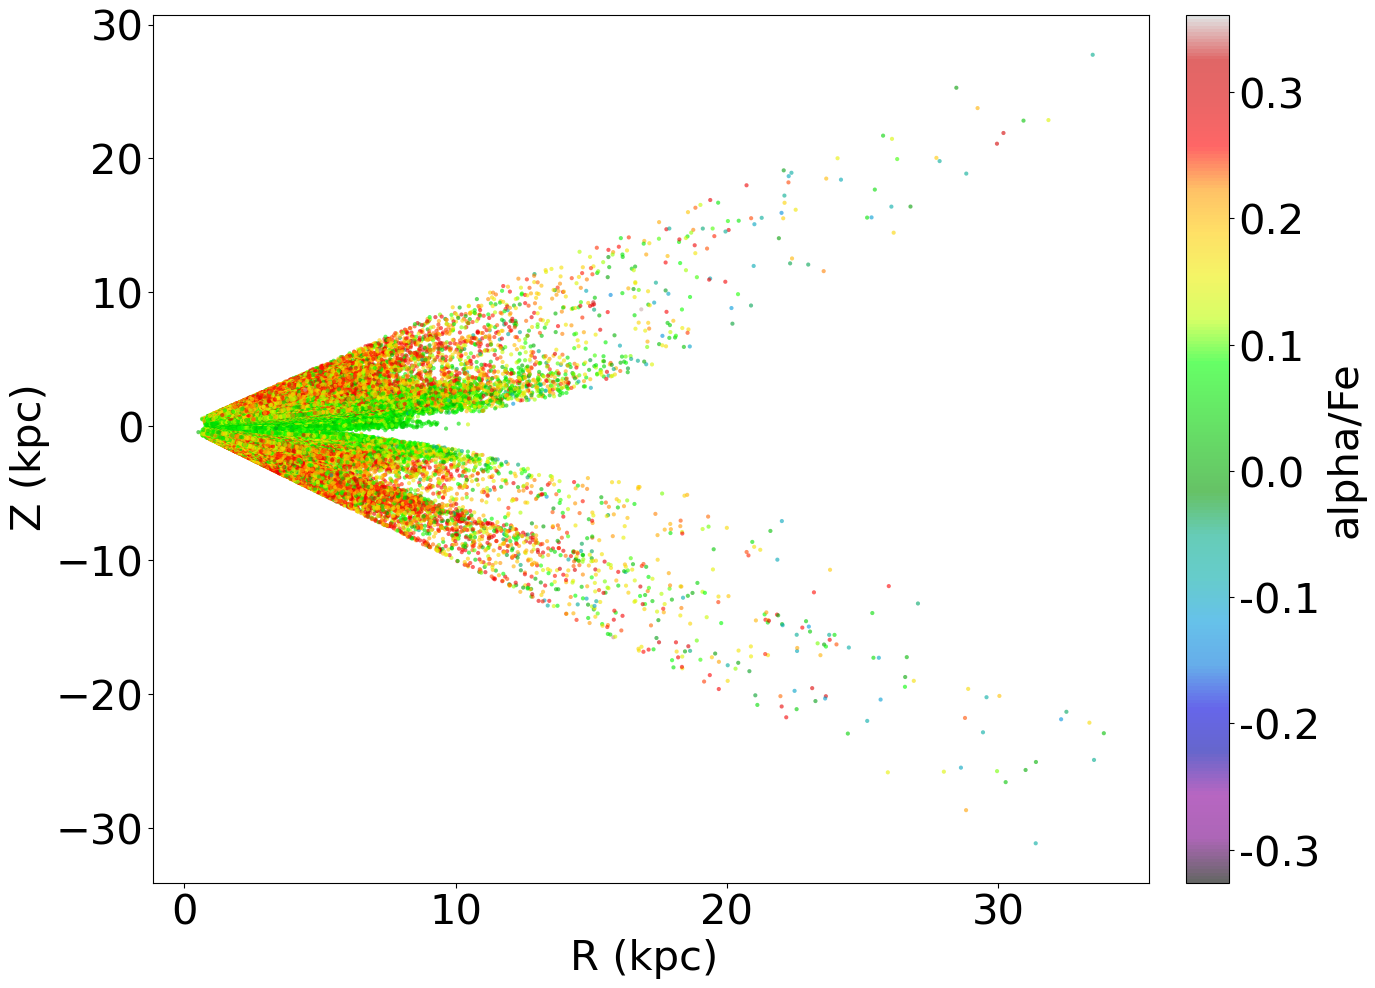

In [51]:
plot_data(filtered_D, filtered_z, filtered_alfa, 'nipy_spectral', 'alpha/Fe')

In [52]:
filtered_fe = filtered_df["NNpredict_Apogee_FE_H"]

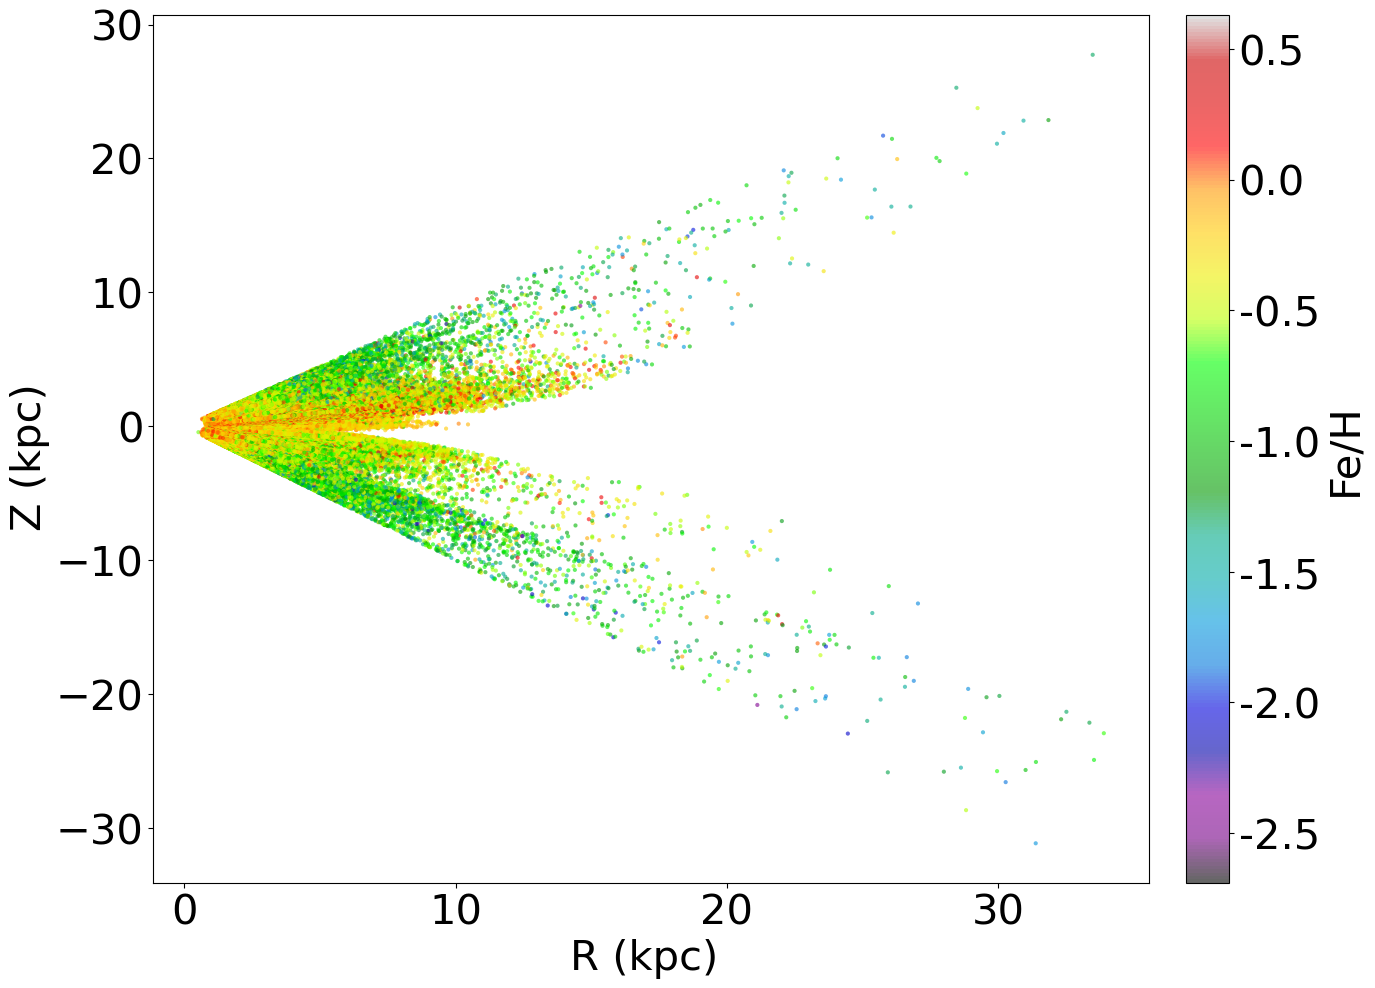

In [53]:
plot_data(filtered_D, filtered_z, filtered_fe, 'nipy_spectral', 'Fe/H')

In [54]:
filtered_X, filtered_Y, filtered_Z = estimate_cartesian_coordinates_ra_dec(filtered_D, filtered_ra, filtered_dec)

In [55]:
filtered_R = np.sqrt(filtered_X**2 + filtered_Y**2)

In [56]:
filtered_Fe = filtered_df["NNpredict_Apogee_FE_H"]

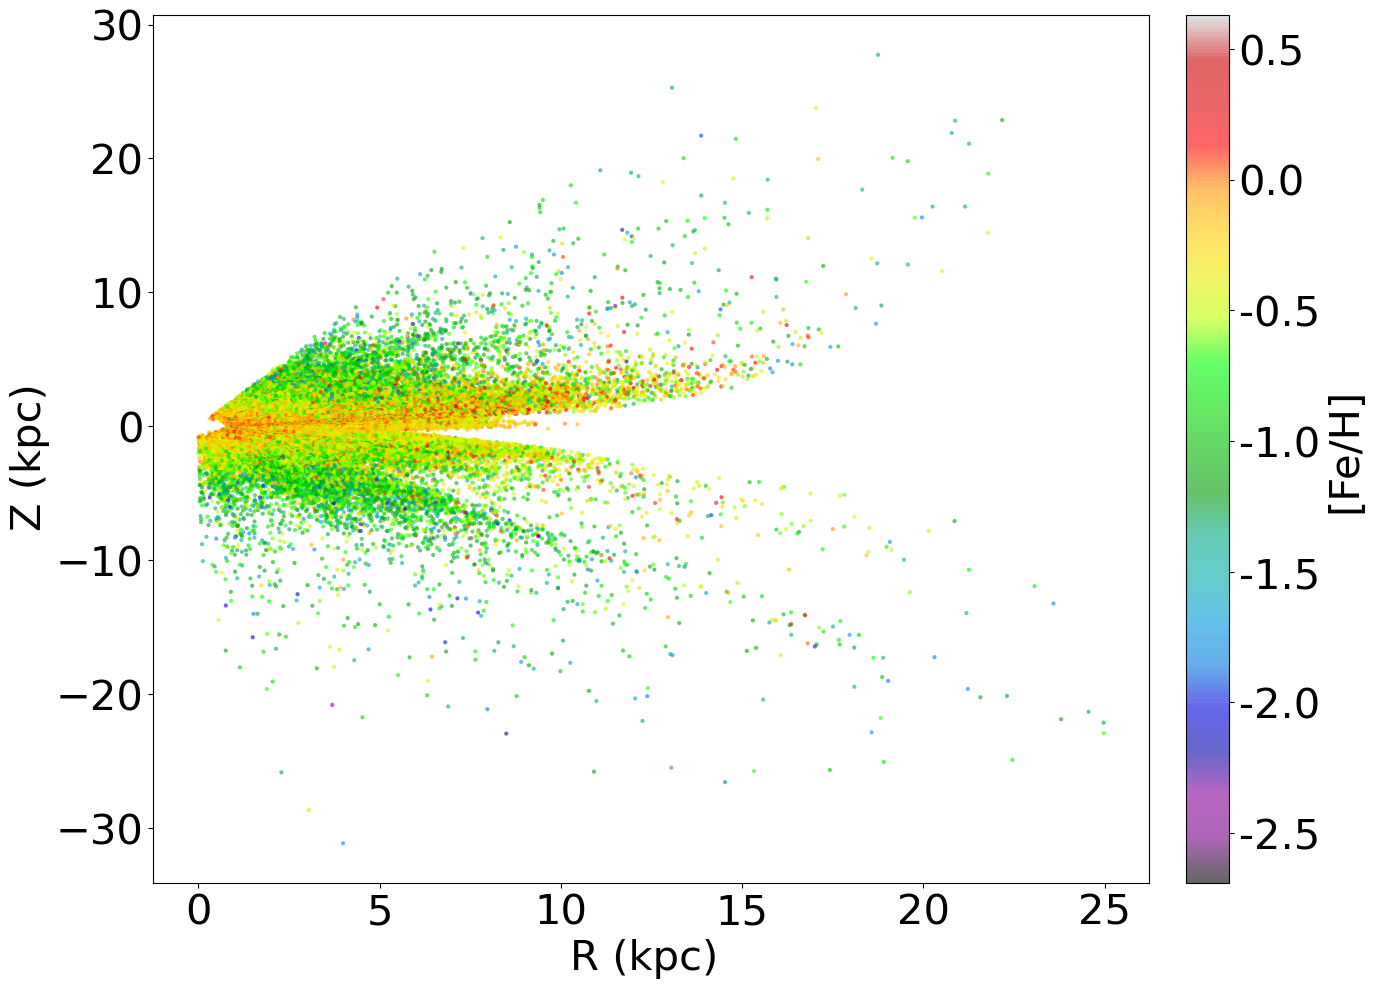

In [57]:
plot_data(filtered_R, filtered_Z, filtered_Fe, 'nipy_spectral', '[Fe/H]')

In [58]:
R_0 = 8.122

In [59]:
R_ = estimate_Galactocentric_radius(R_0, filtered_D, filtered_ra, filtered_dec, filtered_z)

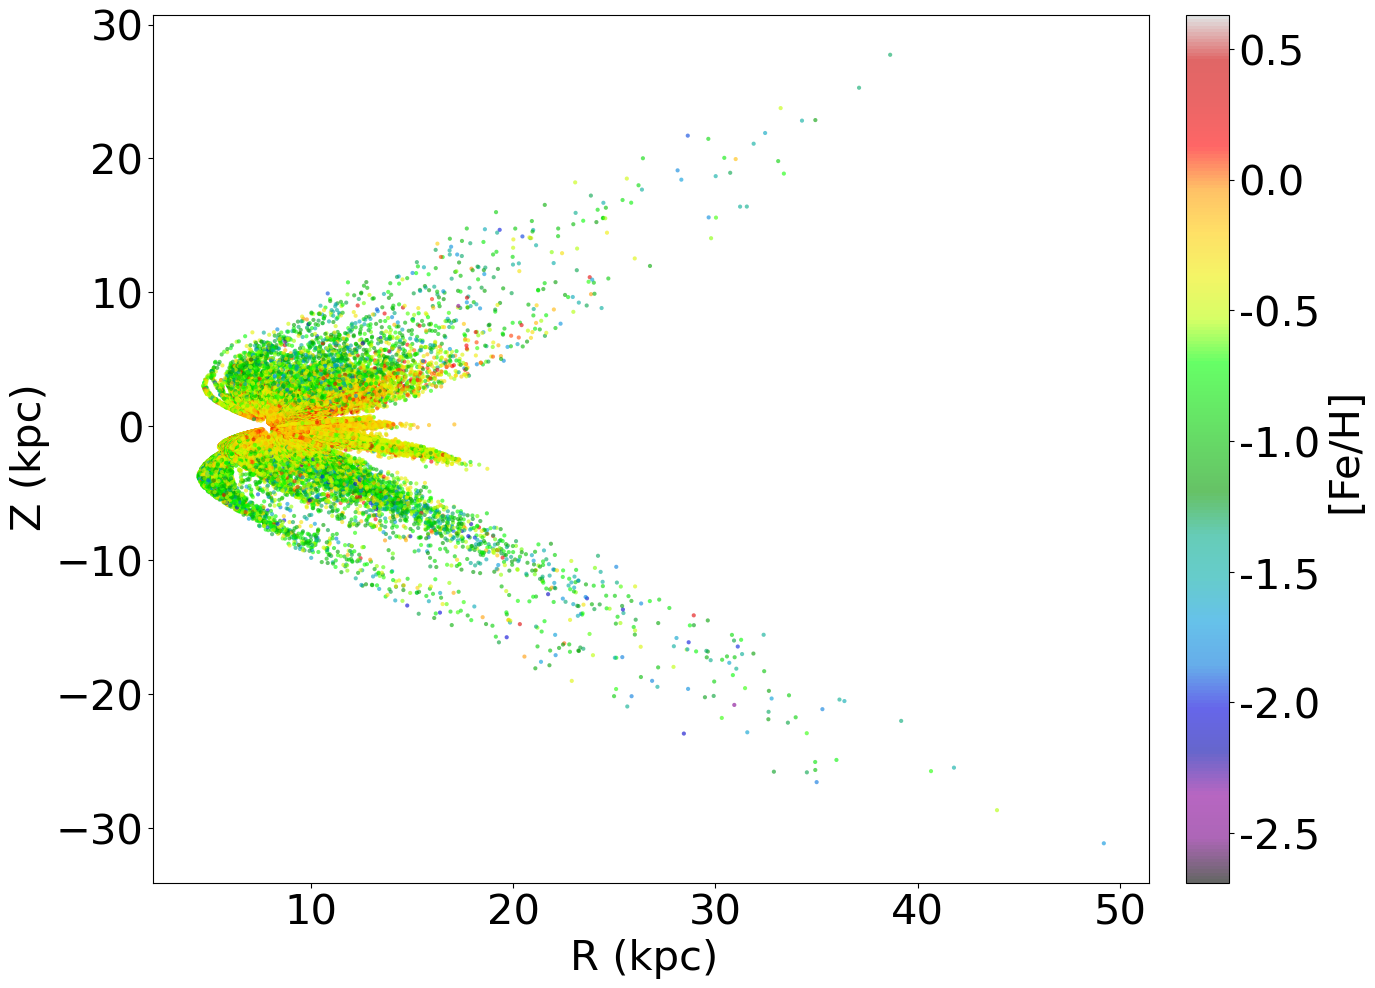

In [60]:
plot_data(R_, filtered_Z, filtered_Fe, 'nipy_spectral', '[Fe/H]')